# First model with scikit-learn
> how to build predictive models on tabulardatasets, with only numerical features

- toc: true
- badges: false
- comments: true
- author: Cécile Gallioz
- categories: [sklearn, v2]

# Loading

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time

In [2]:
myData = pd.read_csv("../../scikit-learn-mooc/datasets/adult-census-numeric.csv")

In [3]:
myData.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [4]:
print(f"The dataset data contains {myData.shape[0]} samples and {myData.shape[1]} features")

The dataset data contains 39073 samples and 5 features


In [5]:
myData.dtypes

age                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
class             object
dtype: object

In [6]:
target_column = 'class'
target = myData[target_column]

In [7]:
target.value_counts()

 <=50K    29736
 >50K      9337
Name: class, dtype: int64

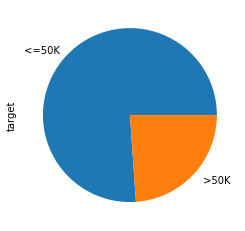

In [8]:
pie = target.value_counts(normalize=True)
pie.plot(kind="pie", label="target");

In [9]:
data = myData.drop(columns=target_column)

In [10]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

# Classification model : K-nearest neighbors

## Train = evaluation data (!!)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# 
model = KNeighborsClassifier()
model.fit(data, target);

In [12]:
target_predicted = model.predict(data)

In [13]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [14]:
target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [15]:
print(f"Number of correct prediction: "
      f"{(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 4 / 5


In [16]:
(target == target_predicted).mean()

0.8238169580016892

## Train-test data split

In [17]:
adult_census_test = pd.read_csv('../../scikit-learn-mooc/datasets/adult-census-numeric-test.csv')

In [18]:
target_test = adult_census_test[target_column]
data_test = adult_census_test.drop(columns=target_column)

In [19]:
print(f"The testing dataset contains {data_test.shape[0]} samples and "
      f"{data_test.shape[1]} features")

The testing dataset contains 9769 samples and 4 features


In [20]:
accuracy = model.score(data_test, target_test)

In [21]:
model_name = model.__class__.__name__

In [22]:
print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.807
